# **Universidad ICESI**

*Milton Orlando Sarria*

----


## **M칤nimos Cuadrados Ordinarios (OLS)**


### Problema,
Se tienen un conjunto de observaciones ${(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),(x^{(3)},y^{(3)}),...,(x^{(m)},y^{(m)})}$. Llamaremos a la variable $x$ predictor o feature. Llamaremos a la variable y, respuesta o salida (target en ingl칠s).
La idea es construir un modelo que aprenda a **predecir** o **estimar** la respuesta y en funci칩n de un predictor $x$. A esta predicci칩n o estimaci칩n la llamaremos en general $\hat{y}$.
    
El algoritmo de **M칤nimos Cuadrados Ordinarios (OLS)** se utiliza para estimar los par치metros de un modelo de regresi칩n lineal, minimizando la suma de los errores cuadr치ticos entre los valores observados y los valores ajustados.


---
### **1. Modelo Lineal simple**

El modelo de **regresi칩n lineal simple** se utiliza para modelar la relaci칩n entre una 칰nica variable independiente $x$ y una variable objetivo (o dependiente) $y$. El modelo asume una relaci칩n lineal entre estas variables y se representa de la siguiente manera:

$
h_\theta(x) = \theta_0 + \theta_1 x + \epsilon
$

Aqu칤:

- $h_\theta(x)$ es el valor predicho (o hip칩tesis).
- $\theta_0$ es el intercepto, es decir, el valor de $y$ cuando $x = 0$.
- $\theta_1$ es la pendiente, que determina cu치nto cambia \(y\) por cada unidad de cambio en \(x\).
- $\epsilon$ es el error aleatorio con distribuci칩n normal


In [72]:
## librerias
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random

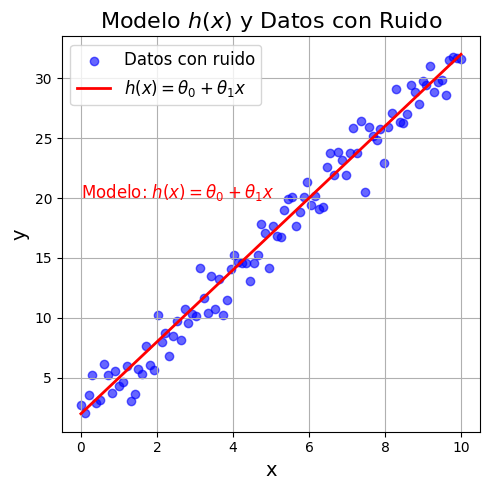

In [73]:

# Par치metros de la l칤nea recta original
theta_0 = 2  # Intercepto
theta_1 = 3  # Pendiente

theta_true = [theta_0, theta_1]
# Generar datos
m = 100  # N칰mero de observaciones

np.random.seed(42)  # Semilla para reproducibilidad
x = np.linspace(0, 10, m)  # m puntos equidistantes entre 0 y 10
y_true = theta_0 + theta_1 * x  # L칤nea recta original
ruido = 0.5*np.random.normal(0, 3, size=x.shape)  # Ruido gaussiano
y = y_true + ruido  # Datos con ruido

# Crear la gr치fica
plt.figure(figsize=(5, 5))

# Graficar los datos con ruido
plt.scatter(x, y, color='blue', label='Datos con ruido', alpha=0.6)

# Graficar la l칤nea recta original (modelo)
plt.plot(x, y_true, color='red', label=r'$h(x) = \theta_0 + \theta_1 x$', linewidth=2)

# A침adir texto en la gr치fica
plt.text(0, 20, r'Modelo: $h(x) = \theta_0 + \theta_1 x$', fontsize=12, color='red')

# Configuraci칩n de la gr치fica
plt.title('Modelo $h(x)$ y Datos con Ruido', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar la gr치fica
plt.show()

### 2. Representaci칩n Matricial

Para trabajar con m칰ltiples observaciones ($m$ ejemplos en total), extendemos la notaci칩n para representar todos los datos de entrada como una matriz de dise침o $\mathbf{X}$, donde cada fila es un vector extendido $[1, x^{(i)}]$:

$
\mathbf{X} = \begin{bmatrix}
1 & x^{(1)} \\
1 & x^{(2)} \\
\vdots & \vdots \\
1 & x^{(m)}
\end{bmatrix}
$

Las predicciones para todas las observaciones se representan como:

$
\mathbf{h}_\theta = \mathbf{X} \mathbf{\theta}
$
- $\mathbf{X}$ es la matriz de dise침o $(m \times d$), donde $d$ incluye los t칠rminos de intercepto y variables independientes).
- $\mathbf{\theta}$ es el vector de par치metros $(d \times 1$).
- $\mathbf{y}$ es el vector de valores reales $(m \times 1$).

El vector de errores es:

$
\mathbf{e} = \mathbf{X} \mathbf{\theta} - \mathbf{y}
$

La suma de los errores cuadr치ticos se representa como el producto escalar del vector de errores consigo mismo:

$
\mathbf{e}^T \mathbf{e} = (\mathbf{X} \mathbf{\theta} - \mathbf{y})^T (\mathbf{X} \mathbf{\theta} - \mathbf{y})
$

La funci칩n de costo $J(\theta)$ en forma matricial es:

$
J(\theta) = \frac{1}{m} (\mathbf{X} \mathbf{\theta} - \mathbf{y})^T (\mathbf{X} \mathbf{\theta} - \mathbf{y})
$

---


### **3. Problema de Minimizaci칩n**
El objetivo del OLS es encontrar los valores de $\boldsymbol{\theta}$ que minimicen la suma de los errores cuadr치ticos:

$
\mathcal{L}(\boldsymbol{\theta}) = (\mathbf{y} - \mathbf{X} \boldsymbol{\theta})^\top (\mathbf{y} - \mathbf{X} \boldsymbol{\theta})
$

---

### **Derivaci칩n de la Soluci칩n**
Expandimos la funci칩n de p칠rdida:

$
\mathcal{L}(\boldsymbol{\theta}) = \mathbf{y}^\top \mathbf{y} - 2 \mathbf{y}^\top \mathbf{X} \boldsymbol{\theta} + \boldsymbol{\theta}^\top \mathbf{X}^\top \mathbf{X} \boldsymbol{\theta}
$

Derivamos respecto a $\boldsymbol{\theta}$ y la igualamos a cero:

$
\frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = -2 \mathbf{X}^\top \mathbf{y} + 2 \mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} = 0
$

Resolviendo:

$
\mathbf{X}^\top \mathbf{X} \boldsymbol{\theta} = \mathbf{X}^\top \mathbf{y}
$

$
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$


---

## **Implementaci칩n en Python**

La implementaci칩n del procedimiento en Python usando NumPy es la siguiente:


In [74]:
A = np.array([[1, 2], 
              [3, 4]])

B = np.array([[5, 6], 
              [7, 8]])

print(A * B)  # Multiplicaci칩n elemento a elemento


[[ 5 12]
 [21 32]]


In [75]:
print(A @ B)  # Multiplicaci칩n de matrices


[[19 22]
 [43 50]]


In [77]:
# Crear matriz X con un t칠rmino de intercepto
X = np.vstack([np.ones((m)), x]).T  # Agregar columna de 1s para el intercepto
# Crear vector de respuestas y
true_theta = np.array([theta_0,theta_1])  # Coeficientes verdaderos
# Implementar OLS
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ y
theta_hat = XtX_inv @ XtY

print("Coeficientes estimados (theta):", theta_hat)

Coeficientes estimados (theta): [1.74078072 3.0206899 ]


---

## Interpretaci칩n de los Resultados
El vector $\boldsymbol{\theta}$ estimado (almacenado en `theta_hat`) contiene los coeficientes ajustados:
- El primer coeficiente corresponde al intercepto.
- El seundo corresponde a las variable independiente.

---

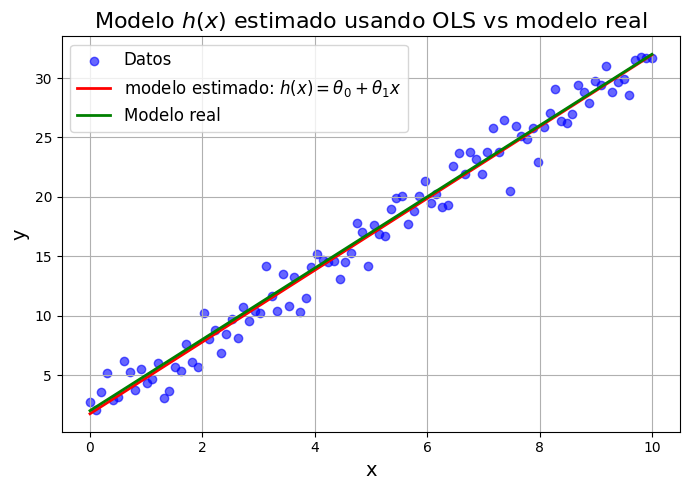

In [78]:
# Crear la gr치fica
plt.figure(figsize=(7, 5))

# Graficar los datos con ruido
plt.scatter(X[:,1], y, color='blue', label='Datos', alpha=0.6)

# Graficar la l칤nea recta del modelo estimado
plt.plot(X[:,1], X@theta_hat, color='red', label=r'modelo estimado: $h(x) = \theta_0 + \theta_1 x$', linewidth=2)

# Graficar la l칤nea recta del modelo estimado
plt.plot(X[:,1], X@true_theta, color='green', label=r'Modelo real', linewidth=2)
# Configuraci칩n de la gr치fica
plt.title('Modelo $h(x)$ estimado usando OLS vs modelo real', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
# Mostrar la gr치fica
plt.show()

## **4 Validaci칩n de Resultados**
Para verificar la calidad del ajuste, calculamos los valores ajustados ($\hat{\mathbf{y}} = \mathbf{X} \boldsymbol{\theta}$) y medimos el error cuadr치tico medio:

In [79]:
# Valores ajustados
y_hat = X @ theta_hat
# Error cuadr치tico medio (MSE)
mse = np.mean((y - y_hat) ** 2)
print("Error cuadr치tico medio (MSE):", mse)

Error cuadr치tico medio (MSE): 1.8335356053706762


In [80]:
# Ajustar el modelo usando statsmodels
model_sm = sm.OLS(y, X)  # Nota: X ya incluye el t칠rmino de intercepto
results_sm = model_sm.fit()

In [81]:
print("Coeficientes estimados (theta) con statsmodels:")
print(results_sm.params)


#Esto deber칤a dar resultados muy similares a los obtenidos manualmente:
# Coeficientes estimados
print("Coeficientes estimados (theta) con Numpy (de forma manual):")
print(theta_hat)


Coeficientes estimados (theta) con statsmodels:
[1.74078072 3.0206899 ]
Coeficientes estimados (theta) con Numpy (de forma manual):
[1.74078072 3.0206899 ]


# **Optimizar la funci칩n de costo de OLS empleando gradiente descendente**


# **Introducci칩n al Gradiente Descendente**

El **gradiente descendente** es un algoritmo de optimizaci칩n utilizado para minimizar funciones de costo en problemas de aprendizaje autom치tico. Se usa para ajustar los par치metros de un modelo de manera iterativa hasta encontrar los valores 칩ptimos.

### **1. Definici칩n Matem치tica**
Dado un conjunto de datos con puntos $(x_i, y_i)$ y una funci칩n de costo $ J(\theta) $ que queremos minimizar, el algoritmo ajusta los par치metros $ \theta $ en la direcci칩n del gradiente negativo:

$
\theta := \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}
$

Donde:
- $ \theta $ son los par치metros del modelo.
- $ \alpha $ es la **tasa de aprendizaje**, que controla el tama침o del paso.
- $ \frac{\partial J(\theta)}{\partial \theta} $ es el **gradiente**, que indica la direcci칩n de mayor incremento de la funci칩n de costo.

---
 游땕

---

### **2. Derivaci칩n de ecuaciones para el modelo de Regresi칩n Lineal simple**

Consideremos un conjunto de puntos y ajustemos una recta de la forma:

$
h_\theta(x) = \theta_0 + \theta_1 x
$

Queremos minimizar la **funci칩n de costo**:

$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$

donde $ m $ es el n칰mero de ejemplos.

El **gradiente** se calcula como:

$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
$

$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
$

La actualizaci칩n de par치metros es:

$
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
$

$
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
$

---
 游땕

### Paso 1: Preparar datos
En este caso usaremos los datos simulados que hemos empleado en los casos anteriores



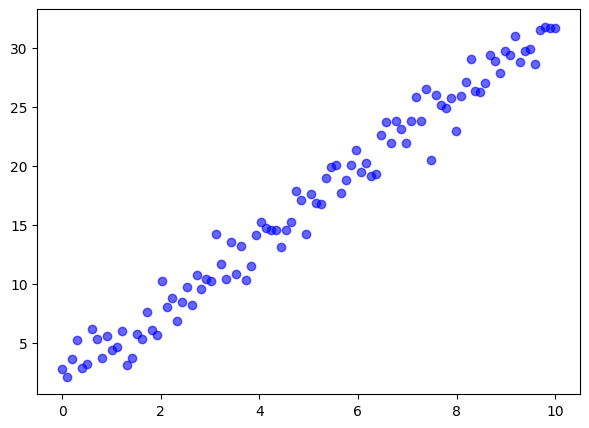

In [92]:
# Crear la gr치fica
plt.figure(figsize=(7, 5))
# Graficar los datos con ruido
plt.scatter(x, y, color='blue', label='Datos', alpha=0.6)


### Paso 2: Inicializar los Par치metros

Inicializamos los par치metros $\theta_0$ y $\theta_1$ con valores iniciales.


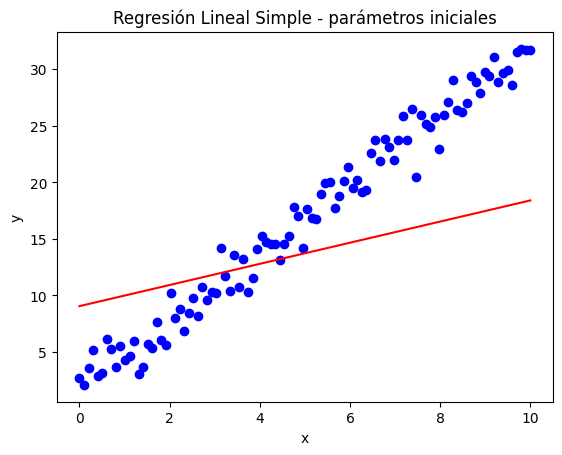

In [93]:
random.seed(20)
# Inicializar par치metros de forma aleatoria
theta_0_h = random.random()*10
random.seed(110)
theta_1_h = random.random()

# Visualizar los datos y la l칤nea de regresi칩n con los par치metros iniciales
plt.scatter(x, y, color='blue')
plt.plot(x, theta_0_h + theta_1_h * x, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresi칩n Lineal Simple - par치metros iniciales')
plt.show()

### Paso 3: Implementar la Hip칩tesis y la Funci칩n de Costo

La hip칩tesis $h(x)$ se define como:

$ h(x) = \theta_0 + \theta_1 \cdot x $

La funci칩n de costo $J(\theta_0, \theta_1)$ se define como:

$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right)^2 $


In [94]:
m = len(y)

def hypothesis(X, t0, t1):
    return t0 + t1 * X

def cost_function(X, y, t0, t1):
    return (1 / (2 * m)) * np.sum((hypothesis(X, t0, t1) - y) ** 2)

### Paso 4: Implementar el Algoritmo de Gradiente Descendente

El gradiente descendente se actualiza seg칰n las siguientes f칩rmulas:

$
\theta_0 := \theta_0 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( h(x^{(i)}) - y^{(i)} \right)
$

$
\theta_1 := \theta_1 - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left( \left( h(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)} \right)
$

Par치metros finales: theta_0_hat = 1.7925733007078979, theta_1_hat = 3.0129023589273642
Par치metros reales: theta_0 = 2, theta_1 = 3


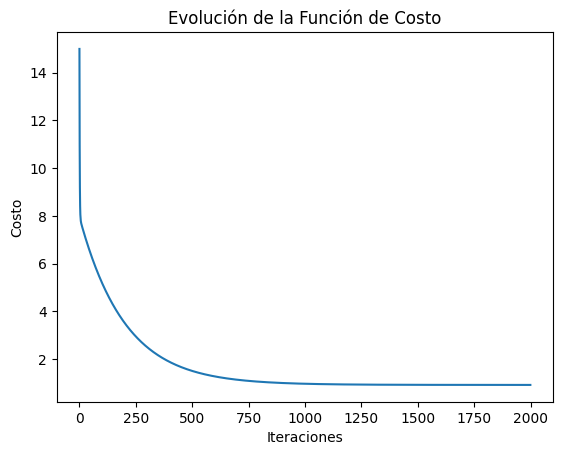

In [95]:
# Listas para almacenar el historial de costos y par치metros
cost_history = []
theta_0_history = []
theta_1_history = []

# Definir la tasa de aprendizaje y el n칰mero de iteraciones
learning_rate = 0.01
n_iterations = 2000
# Algoritmo de gradiente descendente
for _ in range(n_iterations):
    # Calcular las predicciones
    h = hypothesis(x, theta_0_h, theta_1_h)
    
    # Calcular gradientes
    d_theta_0 = (1/m) * np.sum(h - y)
    d_theta_1 = (1/m) * np.sum((h - y) * x)
    
    # Actualizar los par치metros
    theta_0_h -= learning_rate * d_theta_0
    theta_1_h -= learning_rate * d_theta_1
    
    # Almacenar el costo y los par치metros en cada iteraci칩n
    cost = cost_function(x, y, theta_0_h, theta_1_h)
    cost_history.append(cost)
    theta_0_history.append(theta_0_h)
    theta_1_history.append(theta_1_h)


# Mostrar los par치metros finales
print(f"Par치metros finales: theta_0_hat = {theta_0_h}, theta_1_hat = {theta_1_h}")

# Mostrar los par치metros reales
print(f"Par치metros reales: theta_0 = {theta_0}, theta_1 = {theta_1}")

# Visualizar la evoluci칩n de la funci칩n de costo
plt.plot(cost_history)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Evoluci칩n de la Funci칩n de Costo')
plt.show()

### Paso 5: Visualizar la l칤nea de regresi칩n con lospar치metros estimados


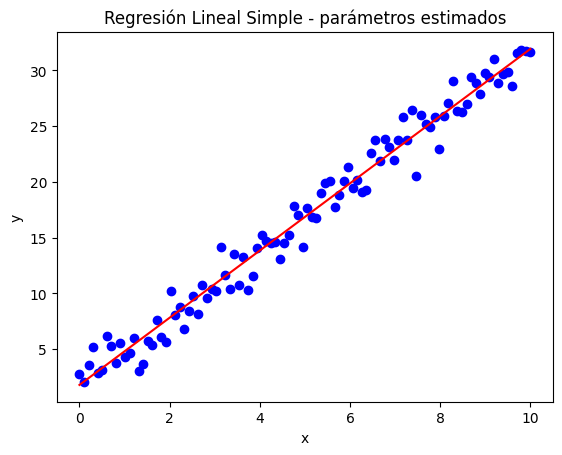

In [96]:
# Visualizar los datos y la l칤nea de regresi칩n con los par치metros estimados
plt.scatter(x, y, color='blue')
plt.plot(x, theta_0_h + theta_1_h * x, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresi칩n Lineal Simple - par치metros estimados')
plt.show()

## 游늵  Visualizar gradient descent 

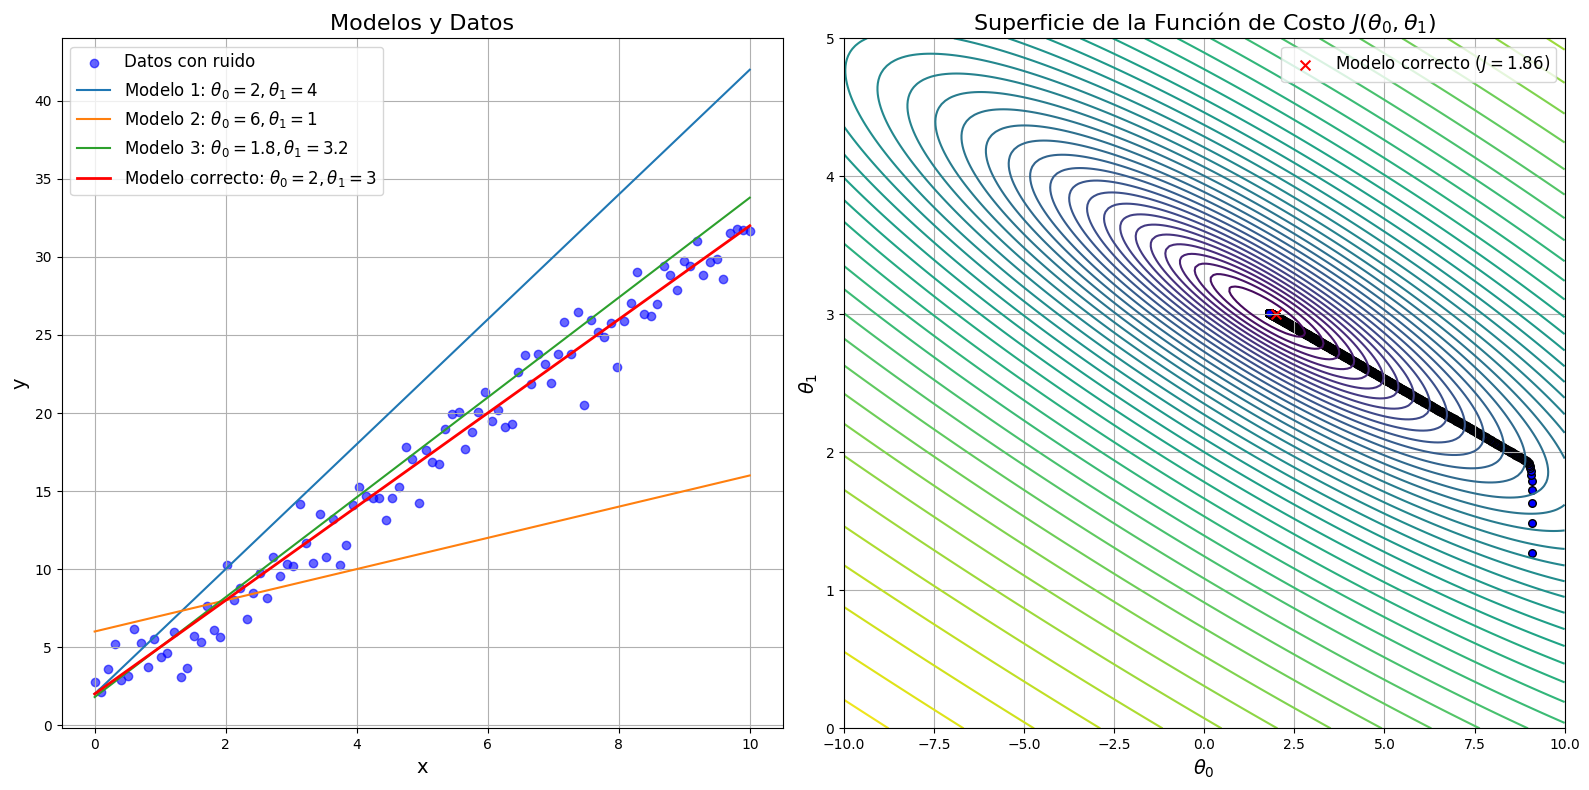

In [97]:
# Definici칩n de la funci칩n de costo
def calcular_costo(x,y,t0, t1):
    y_pred = t0 + t1 * x
    return np.mean((y_pred - y) ** 2)

# Crear una cuadr칤cula de valores para theta_0 y theta_1
theta_0_vals = np.linspace(-10, 10, 200)
theta_1_vals = np.linspace(0, 5, 200)
T0, T1 = np.meshgrid(theta_0_vals, theta_1_vals)

# Calcular la superficie de la funci칩n de costo J(theta_0, theta_1)
J_vals = np.array([[calcular_costo(x,y,t0, t1) for t1 in theta_1_vals] for t0 in theta_0_vals])

# Valores de modelos alternativos
models = [
    (2, 4),  # Modelo 1
    (6, 1),  # Modelo 2
    (1.8, 3.2),  # Modelo 3
]

# C치lculo del costo para cada modelo alternativo
J_models = [calcular_costo(x,y,t0, t1) for t0, t1 in models]
# Crear la figura
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# --- Gr치fico de la izquierda: Modelos con datos
axes[0].scatter(x, y, color='blue', label='Datos con ruido', alpha=0.6)
# Graficar los modelos alternativos
for i, (t0, t1) in enumerate(models):
    y_model = t0 + t1 * x
    axes[0].plot(x, y_model, label=f'Modelo {i+1}: $\\theta_0={t0}, \\theta_1={t1}$')
# Graficar el modelo correcto
axes[0].plot(x, y_true, color='red', linewidth=2, label=f'Modelo correcto: $\\theta_0={theta_0}, \\theta_1={theta_1}$')

# Configuraci칩n del gr치fico izquierdo
axes[0].set_title('Modelos y Datos', fontsize=16)
axes[0].set_xlabel('x', fontsize=14)
axes[0].set_ylabel('y', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True)

# --- Gr치fico de la derecha: Superficie de J
contour = axes[1].contour(T0, T1, np.log(J_vals.T), levels=50, cmap='viridis')
#contour = axes[1].contourf(T0, T1, J_vals.T, levels=50, cmap='viridis')
# Graficar los puntos para los modelos alternativos

axes[1].scatter(theta_0_history, theta_1_history, color="blue", edgecolor='black', s=30)


# Graficar el modelo correcto
J = calcular_costo(x,y,theta_0, theta_1)
axes[1].scatter(theta_true[0], theta_true[1], color='red', marker='x', s=50, label=f'Modelo correcto ($J={J:.2f}$)')

# Configuraci칩n del gr치fico derecho
axes[1].set_title('Superficie de la Funci칩n de Costo $J(\\theta_0, \\theta_1)$', fontsize=16)
axes[1].set_xlabel('$\\theta_0$', fontsize=14)
axes[1].set_ylabel('$\\theta_1$', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True)

# Ajuste final y mostrar
plt.tight_layout()
plt.show()
